<a href="https://colab.research.google.com/github/tya2aa2/TYAPROJECT-/blob/main/Tingkat_kehematan_bahan_bakar_kendaraan_MPG_By_TYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project-based assignment - Pembelajaran mesin

Semester ganjil 2022/2023

Nama Kelompok :
Adhitya Melani Eka Janarwati - 1301204046

Azzahra Kamila Linanda - 1301204275

Mega Silvia Desvi - 1301204086



Deskripsi Tugas:
Pada tugas kali ini kami disuruh memprediksi tingkat kehematan bahan bakar kendaraan/MPG (miles per gallon: rataan jarak tempuh mobil dalam mil untuk setiap galon bahan bakar yang dikonsumsi) berdasarkan profil mobil yang diberikan yang diwakili oleh atribut-atribut seperti silinder, daya (tenaga kuda), tahun keluaran, dll. Dataset autos MPG beserta deskripsi atribut-atributnya bisa diakses di tautan berikut (login SSO):

https://drive.google.com/drive/folders/1HmKavcNCij76k02nCYQdP012cepM2nmz?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

Read data

In [ ]:
#membaca data autos_mpg.csv
train_df = pd.read_csv('autos_mpg.csv')
train_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#mengetahui informasi data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#code ini digunakan untuk menghitung beberapa data statistik seperti persentil, rata-rata dan std
#dari nilai numerik Seri atau DataFrame
train_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#Code tersebut digunakan untuk menampilkan menampilkan dimensi data, menampilkan 9 column dan 398 baris.
print(f'Training Shape: {train_df.shape}')

Training Shape: (398, 9)


In [ ]:
#menampilkan 5 data teratas.
print(train_df.head())
print(train_df.sample(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
      mpg  cylinders  displacement horsepower  weight  acceleration  \
28    9.0          8         304.0        193    4732          18.5   
370  31.0          4         112.0         85    2575          16.2   
204  32.0          4          85.0         70    1990          17.

In [ ]:
#code .info() untuk mengetahui informasi data.
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


None

In [ ]:
#code ini melakukan pencarian missing value dimana
#kita lihat pada statistik dasar bahwa kolom tenaga kuda memiliki tipe data objek tetapi harus tipe float.
train_df['horsepower'] = train_df['horsepower'].replace('?', np.NaN).astype('float64')

In [ ]:
#menampilkan correlation coefficient
train_df_corr = train_df.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
train_df_corr.rename(columns={"level_0": "Feature A",
                             "level_1": "Feature B", 0: 'Correlation Coefficient'}, inplace=True)
train_df_corr[train_df_corr['Feature A'] == 'horsepower'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
5,horsepower,horsepower,1.000000
12,horsepower,displacement,0.897257
17,horsepower,weight,0.864538
18,horsepower,cylinders,0.842983
24,horsepower,mpg,0.778427
28,horsepower,acceleration,0.689196
45,horsepower,origin,0.455171
50,horsepower,model_year,0.416361


In [ ]:
#mengisi nilai yang hilang dengan mengelompokkan kolom yang sama.
train_df['horsepower'] = train_df.groupby(['displacement'], sort=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))
train_df['horsepower'] = train_df.groupby(['cylinders'], sort=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


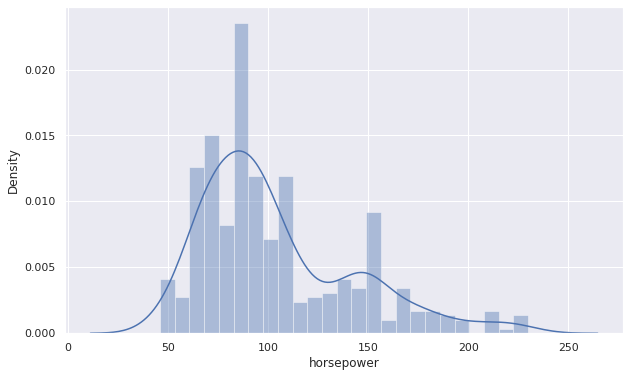

In [ ]:
sns.set()
plt.subplots(figsize=(10, 6))
sns.distplot(train_df['horsepower'],bins=25)
plt.show()

In [ ]:
#mengecek benar atau tidaknya missing value
print(f'There are some missing values: {train_df.isna().any().any()}')

There are some missing values: False


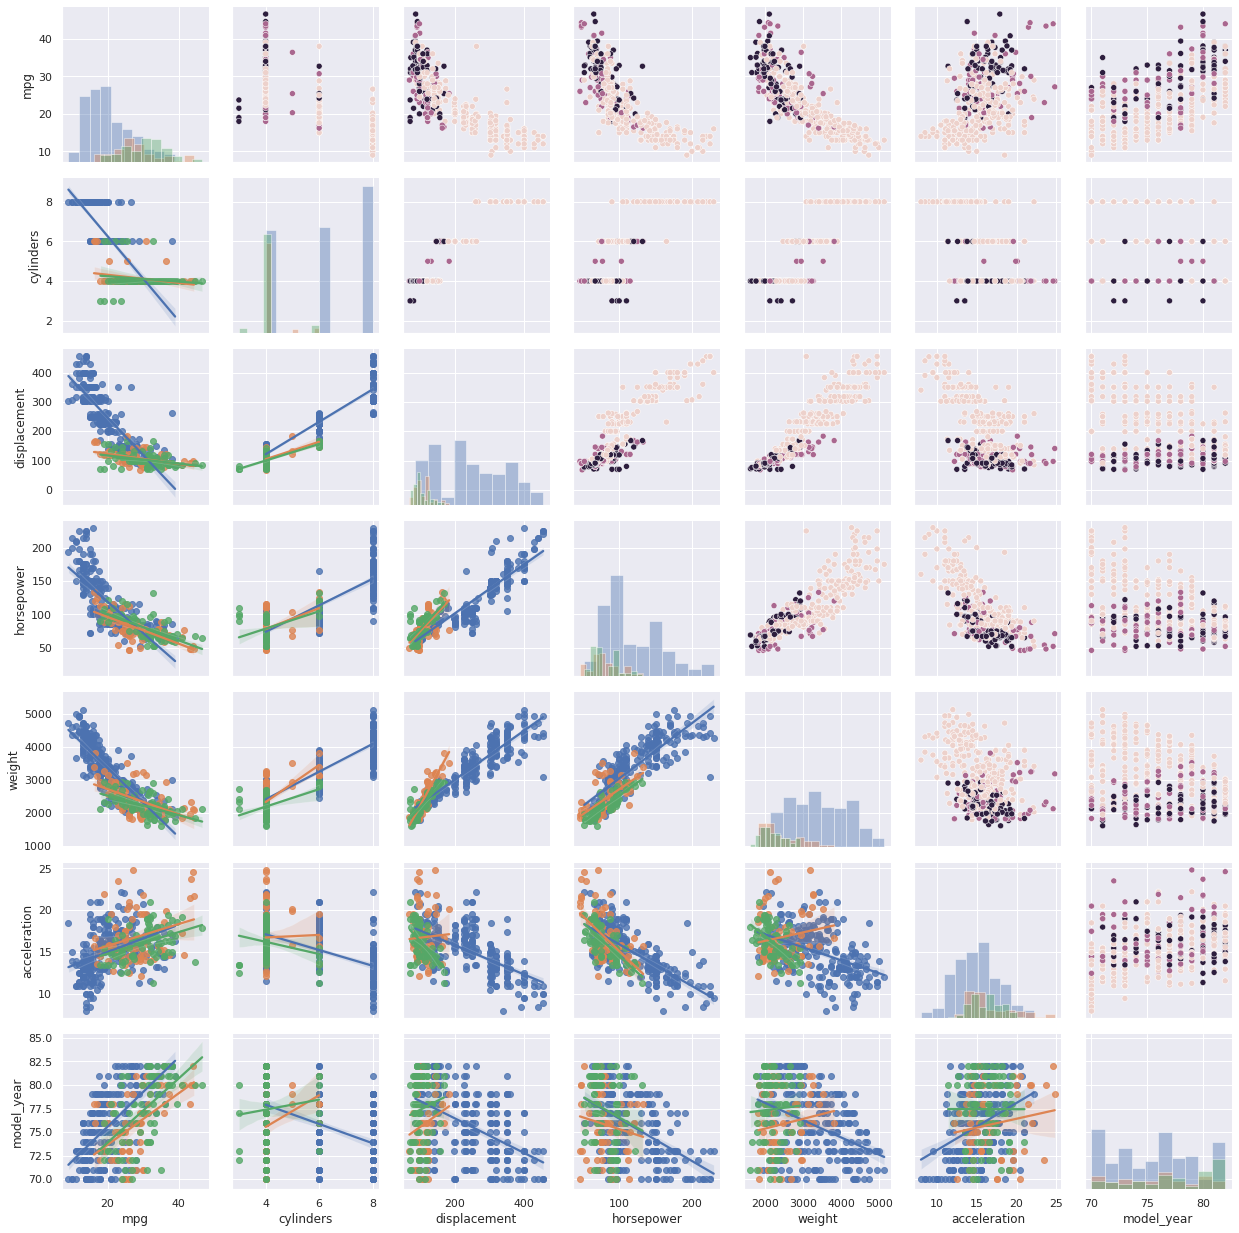

In [ ]:
#menampilkan eksplorasi
g = sns.PairGrid(train_df.drop('car_name',axis=1), hue='origin')
g = g.map_diag(plt.hist, alpha=0.4)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)

Data Processing & Feature Engineering

In [ ]:
#ambil dari fitur nama mobil dan mengekstraknya untuk mencari hubungan di antara masing - masing fitur.
pd.crosstab(train_df['car_name'],train_df['origin'])

origin,1,2,3
car_name,,,
amc ambassador brougham,1,0,0
amc ambassador dpl,1,0,0
amc ambassador sst,1,0,0
amc concord,2,0,0
amc concord d/l,1,0,0
...,...,...,...
vw dasher (diesel),0,1,0
vw pickup,0,1,0
vw rabbit,0,2,0


In [ ]:
train_df['Brand'] = train_df['car_name'].str.extract('([A-Za-z]+)\s', expand=False)

In [ ]:
#memiliki beberapa kesalahan ketik dan nama duplikat untuk beberapa merek
train_df['Brand']= train_df['Brand'].replace(np.NaN, 'subaru')
train_df['Brand']= train_df['Brand'].replace('chevroelt', 'chevrolet')
train_df['Brand']= train_df['Brand'].replace('vw', 'volkswagen')
train_df['Brand']= train_df['Brand'].replace('toyouta', 'toyota')
train_df['Brand']= train_df['Brand'].replace('vokswagen', 'volkswagen')
train_df['Brand']= train_df['Brand'].replace('maxda', 'mazda')
train_df['Brand']= train_df['Brand'].replace('mazada', 'mazda')
train_df['Brand']= train_df['Brand'].replace('chevy', 'chevrolet')

In [ ]:
#menghitung nilai yang dinormalisasi bernilai true
train_df['Brand'].value_counts(normalize=True)

ford          0.128141
chevrolet     0.118090
plymouth      0.077889
amc           0.070352
dodge         0.070352
toyota        0.065327
datsun        0.057789
volkswagen    0.055276
buick         0.042714
pontiac       0.040201
honda         0.032663
mazda         0.030151
mercury       0.027638
oldsmobile    0.025126
fiat          0.020101
peugeot       0.020101
audi          0.017588
chrysler      0.015075
volvo         0.015075
renault       0.012563
saab          0.010050
opel          0.010050
subaru        0.010050
benz          0.005025
cadillac      0.005025
bmw           0.005025
capri         0.002513
hi            0.002513
mercedes      0.002513
triumph       0.002513
nissan        0.002513
Name: Brand, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


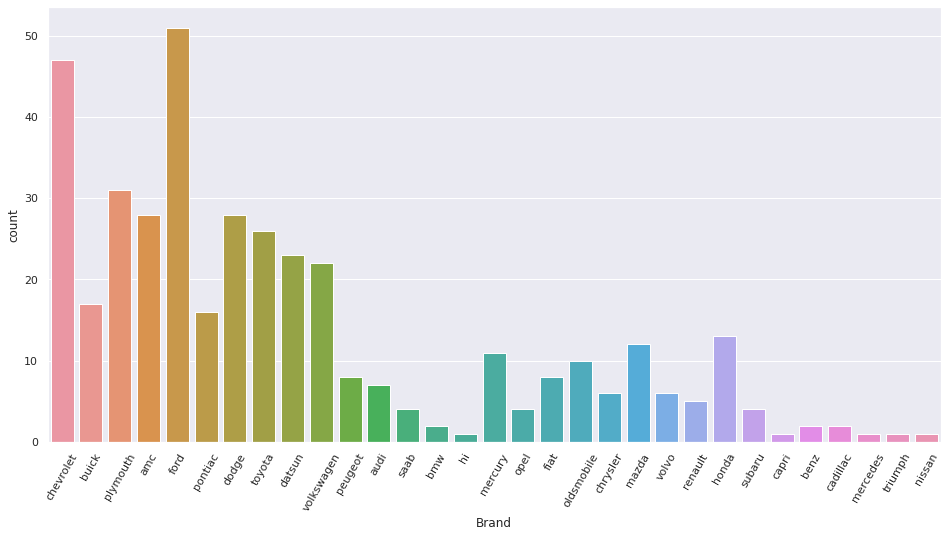

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(train_df['Brand'])
plt.xticks(rotation=60)
plt.show()

In [ ]:
#Kami akan mengkategorikannya dengan menggunakan LabelEncoder sklearn untuk mengubah merek" menjadi model yang doterapkan.
le = LabelEncoder()
train_df['Brand'] = le.fit_transform(train_df['Brand'])
train_df.drop('car_name', axis=1, inplace=True)
train_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Brand
265,17.5,8,318.0,140.0,4080,13.7,78,1,10
182,28.0,4,107.0,86.0,2464,15.5,76,2,11
89,15.0,8,318.0,150.0,3777,12.5,73,1,10
292,18.5,8,360.0,150.0,3940,13.0,79,1,8
350,34.7,4,105.0,63.0,2215,14.9,81,1,22


In [ ]:
#untuk memeriksa kemiringan distribusi data
features=train_df.columns.tolist()
for feature in features:
    print(f'{feature} Skewness: {train_df[feature].skew():.2f}, Kurtosis: {train_df[feature].kurtosis():.2f}')

mpg Skewness: 0.46, Kurtosis: -0.51
cylinders Skewness: 0.53, Kurtosis: -1.38
displacement Skewness: 0.72, Kurtosis: -0.75
horsepower Skewness: 1.11, Kurtosis: 0.75
weight Skewness: 0.53, Kurtosis: -0.79
acceleration Skewness: 0.28, Kurtosis: 0.42
model_year Skewness: 0.01, Kurtosis: -1.18
origin Skewness: 0.92, Kurtosis: -0.82
Brand Skewness: 0.22, Kurtosis: -1.03


In [ ]:
#untuk mengurangi kemiringingan pada data
skew_cols=['cylinders','displacement','horsepower','weight']
train_df[skew_cols]=np.log1p(train_df[skew_cols])
for feature in features:
    print(f'{feature} skewness: {train_df[feature].skew():.2f}, Kurtosis: {train_df[feature].kurtosis():.2f}')

mpg skewness: 0.46, Kurtosis: -0.51
cylinders skewness: 0.39, Kurtosis: -1.50
displacement skewness: 0.23, Kurtosis: -1.34
horsepower skewness: 0.40, Kurtosis: -0.40
weight skewness: 0.16, Kurtosis: -1.09
acceleration skewness: 0.28, Kurtosis: 0.42
model_year skewness: 0.01, Kurtosis: -1.18
origin skewness: 0.92, Kurtosis: -0.82
Brand skewness: 0.22, Kurtosis: -1.03


Modelling

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
import xgboost as xgb
import lightgbm as lgb

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.drop('mpg', axis=1))
    rmse= np.sqrt(np.abs(cross_val_score(model, train_df.drop('mpg', axis=1).values, train_df['mpg'], scoring="neg_mean_squared_error", cv = kf, n_jobs=-1)))
    return(rmse)

def rtw_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.drop('mpg', axis=1))
    rtw= cross_val_score(model, train_df.drop('mpg', axis=1).values, train_df['mpg'], scoring="r2", cv = kf, n_jobs=-1)
    return(rtw)

In [ ]:
mods = [LinearRegression(),Ridge(),GradientBoostingRegressor(),
      RandomForestRegressor(),BaggingRegressor(),
      xgb.XGBRegressor(), lgb.LGBMRegressor()]

model_df = pd.DataFrame({
    'Model': [type(i).__name__ for i in mods],
    'RMSE': [np.mean(rmsle_cv(i)) for i in mods],
    'Rmse Std': [np.std(rmsle_cv(i)) for i in mods],
    'R2': [np.mean(rtw_cv(i)) for i in mods],
    'R2 Std': [np.std(rmsle_cv(i)) for i in mods]})
display(model_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True).style.background_gradient(cmap='summer_r'))

,Model,RMSE,Rmse Std,R2,R2 Std
0,GradientBoostingRegressor,2.744529,0.972643,0.778135,0.988155
1,XGBRegressor,2.749040,0.922898,0.780117,0.922898
2,LGBMRegressor,2.792823,1.048211,0.763523,1.048211
3,RandomForestRegressor,2.826232,1.066693,0.748219,1.129951
4,BaggingRegressor,3.083362,1.109312,0.700285,1.182836
5,LinearRegression,3.571845,0.956566,0.630390,0.956566
6,Ridge,3.588482,0.996708,0.625087,0.996708


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('mpg', axis=1),train_df['mpg'], test_size= 0.33, random_state=42)

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
print(r2_score(y_test, y_pred))

2.7398884564782815
0.8695729435801219


In [ ]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
print(r2_score(y_test, y_pred))

2.754870735982489
0.8681426391403239


In [ ]:
bag_regressor = BaggingRegressor()
bag_regressor.fit(X_train,y_train)
y_predict = bag_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predict))

rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test, y_predict))

2.5115371666359905
0.8904074211830154


2.592824895196443
0.8831985313624716


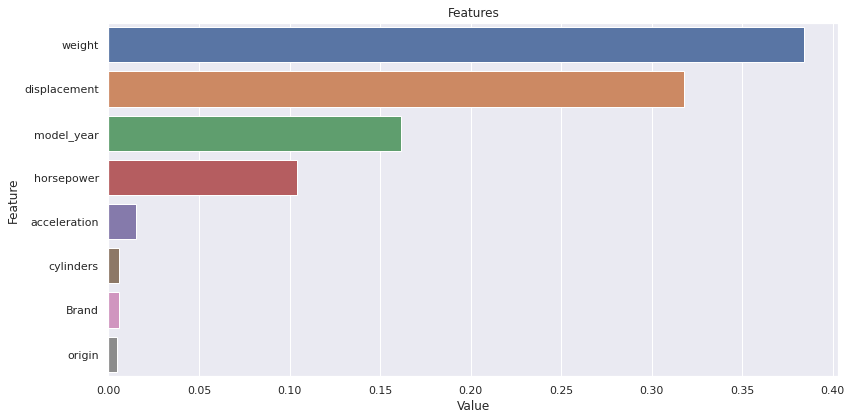

In [ ]:
# program ini untuk memprediksi nilai
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train,y_train)
y_predict = gb_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predict))

rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test, y_predict))


feature_imp = pd.DataFrame(sorted(zip(gb_regressor.feature_importances_,train_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

2.517277991173896
0.8899058392628562


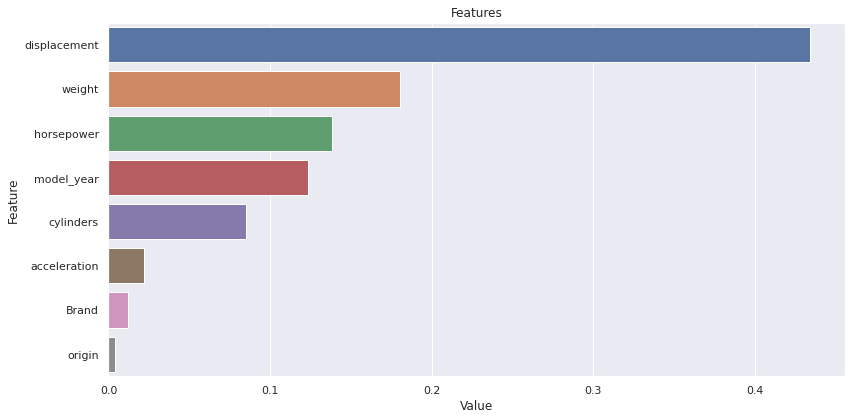

In [ ]:
# code program ini melakukan penghitungan decision tree beberapa kali sehingga membentuk sebuah forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
y_predict = rf_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predict))

rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test, y_predict))


feature_imp = pd.DataFrame(sorted(zip(rf_regressor.feature_importances_,train_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

2.6936688321840863
0.8739362186124774


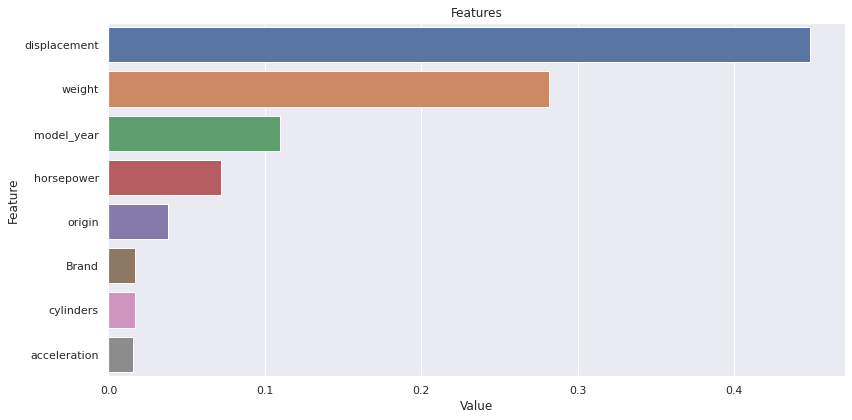

In [ ]:
# code ini untuk peningkatan gradien yang efisien dan efektif
xg_reg=xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')

xg_reg.fit(X_train,y_train)
xg_y_pred=xg_reg.predict(X_test)
xg_rmse=np.sqrt(mean_squared_error(y_test,xg_y_pred))
print(xg_rmse)
print(r2_score(y_test,xg_y_pred))

feature_imp = pd.DataFrame(sorted(zip(xg_reg.feature_importances_,train_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

2.507874838998369
0.8907268043088836


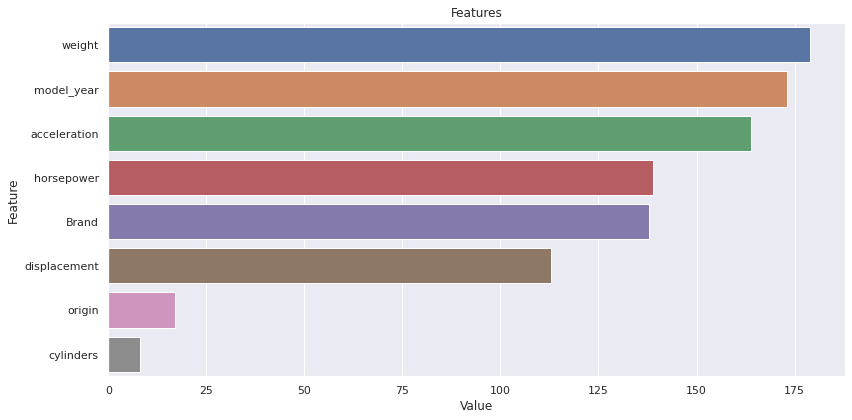

In [ ]:
#code program ini untuk memproses data lebih cepat dan memberikan akurasi yang lebih baik
lgb_reg = lgb.LGBMRegressor()

lgb_reg.fit(X_train,y_train)
y_predict=lgb_reg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test,y_predict))

feature_imp = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_,train_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()